In [1]:
import cv2
import os
from PIL import Image

### Real Video to Frames

In [2]:
def process_video(video_path, output_dir, num_frames=8, frame_size=(128, 128)):
    """
    Processes a video to extract a sequence of frames and saves them as PNG images.

    Args:
        video_path (str): Path to the input video file.
        output_dir (str): Directory to save the extracted frames.
        num_frames (int): Number of frames to extract from the video.
        frame_size (tuple): Size (width, height) to resize each frame.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < num_frames:
        print(f"Video has only {total_frames} frames, which is less than the required {num_frames}.")
        return

    # Calculate the frame step to sample evenly
    step = total_frames // num_frames

    frame_indices = [i * step for i in range(num_frames)]

    current_frame = 0
    extracted_frames = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if current_frame in frame_indices:
            # Convert frame from BGR to RGB (OpenCV uses BGR by default)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Convert to PIL Image for resizing
            img = Image.fromarray(frame)
            img = img.resize(frame_size, Image.Resampling.LANCZOS)

            # Save the frame as a PNG
            frame_name = f"frame_{extracted_frames + 1:02d}.png"
            img.save(os.path.join(output_dir, frame_name))

            extracted_frames += 1

            if extracted_frames >= num_frames:
                break

        current_frame += 1

    cap.release()
    print(f"Extracted {extracted_frames} frames and saved to {output_dir}.")

In [4]:
def process_video_square_crop(video_path, output_dir, num_frames=8, final_size=(128, 128)):
    """
    Processes a video to extract a sequence of frames, crops them into the largest square,
    resizes them, and saves them as PNG images.

    Args:
        video_path (str): Path to the input video file.
        output_dir (str): Directory to save the extracted frames.
        num_frames (int): Number of frames to extract from the video.
        final_size (tuple): Final size (width, height) to resize the cropped square frames.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames < num_frames:
        print(f"Video has only {total_frames} frames, which is less than the required {num_frames}.")
        return

    # Calculate the frame step to sample evenly
    step = total_frames // num_frames

    frame_indices = [i * step for i in range(num_frames)]

    current_frame = 0
    extracted_frames = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if current_frame in frame_indices:
            # Convert frame from BGR to RGB (OpenCV uses BGR by default)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Convert to PIL Image
            img = Image.fromarray(frame)

            # Determine the largest possible square dimensions
            width, height = img.size
            square_size = min(width, height)
            left = (width - square_size) // 2
            top = (height - square_size) // 2
            right = left + square_size
            bottom = top + square_size

            # Crop to the largest square
            img = img.crop((left, top, right, bottom))

            # Resize the square to the final size
            img = img.resize(final_size, Image.Resampling.LANCZOS)

            # Save the frame as a PNG
            frame_name = f"cropped_frame_{extracted_frames + 1:02d}.png"
            img.save(os.path.join(output_dir, frame_name))

            extracted_frames += 1

            if extracted_frames >= num_frames:
                break

        current_frame += 1

    cap.release()
    print(f"Extracted, cropped, and resized {extracted_frames} frames and saved to {output_dir}.")

In [8]:
if __name__ == "__main__":
    # Path to the iPhone video
    videos = [
        # "donkey_1",
        # "donkey_2",
        # "water_1",
        # "water_2",
        # "control_1",
        # "control_2",
        "gummy",
        "cat",
        "frog",
        "crocs",
    ]
    for video in videos:
        video_path = f"./data/videos/{video}.mov"  # Replace with your video path
    
        # Output directory for frames
        output_dir = "./data/output_frames/"
        video_name = os.path.splitext(os.path.basename(video_path))[0]
        video_output_dir = os.path.join(output_dir, video_name)
        os.makedirs(video_output_dir, exist_ok=True)
        
        # Process the video
        process_video(video_path, video_output_dir)
        process_video_square_crop(video_path, video_output_dir)

Extracted 8 frames and saved to ./data/output_frames/gummy.
Extracted, cropped, and resized 8 frames and saved to ./data/output_frames/gummy.
Extracted 8 frames and saved to ./data/output_frames/cat.
Extracted, cropped, and resized 8 frames and saved to ./data/output_frames/cat.
Extracted 8 frames and saved to ./data/output_frames/frog.
Extracted, cropped, and resized 8 frames and saved to ./data/output_frames/frog.
Extracted 8 frames and saved to ./data/output_frames/crocs.
Extracted, cropped, and resized 8 frames and saved to ./data/output_frames/crocs.


### GIF to Dataset

In [4]:
!ls test-ddpm-sampling/reconstructions-40/train_10937_29400.gif

test-ddpm-sampling/reconstructions-40/train_10937_29400.gif


In [23]:
from PIL import Image
import numpy as np

# Open the GIF file
gif_path = "test-ddpm-sampling/reconstructions-40/train_10937_29400.gif"  # Replace with the path to your GIF
gif = Image.open(gif_path)

# List to store frames as numpy arrays
frames = []

# Iterate through the frames in the GIF
for frame in range(gif.n_frames):
    gif.seek(frame)  # Go to the current frame
    frame_image = gif.convert("RGB")  # Ensure it's in RGB format
    frame_image = frame_image.resize((128, 128))
    frame_array = np.array(frame_image)  # Convert to numpy array
    frames.append(frame_array)

# Convert list of frames to a numpy array (8 frames of 128x128 RGB images)
frames_np = np.array(frames)

# Check the shape of the frames (should be (8, 128, 128, 3))
print(frames_np.shape)

(8, 128, 128, 3)


In [24]:
frames[0].shape

(128, 128, 3)

In [30]:
data_path = './data/1.npz'
with open(data_path, 'rb') as f:
    data = np.load(f)
    img_seq = data['rgb'][:8, 0].astype('float32')
    # (Frames, H, W, C) 
    img = img_seq[0]

    loaded_data = img #torch.from_numpy(img).permute(2, 0, 1).float()

np.max(loaded_data), np.min(loaded_data)

(np.float32(0.6627451), np.float32(0.047058824))

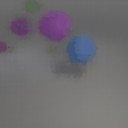

In [25]:
Image.fromarray(frames[0])

In [36]:
def from_gif(in_dir, out_dir):
    # Iterate over all files in the data_root directory
    filenames = sorted([f for f in os.listdir(in_dir) if "train_770_1300900" in f])#f.lower().endswith(".gif")])
    for filename in filenames:
        gif_path = in_dir + filename
        gif = Image.open(gif_path)

        # List to store frames for the current GIF
        # frames = []

        # Iterate through the frames in the GIF
        for frame in range(gif.n_frames):
            gif.seek(frame)  # Go to the current frame
            frame_image = gif.convert("RGB")  # Ensure it's in RGB format
            frame_image = frame_image.resize((128, 128))  # Resize the frame to 128x128
            # frame_array = np.array(frame_image)  # Convert to numpy array
            # frames.append(frame_array)

            frame_image.save(out_dir + f"{filename}_{frame}.jpg")
            print(f"{filename}_{frame}.jpg")

In [37]:
in_dir = "./data/reconstructions-40-better/"
out_dir = "./data/"

os.makedirs(out_dir, exist_ok=True)

from_gif(in_dir, out_dir)

train_770_1300900.gif_0.jpg
train_770_1300900.gif_1.jpg
train_770_1300900.gif_2.jpg
train_770_1300900.gif_3.jpg
train_770_1300900.gif_4.jpg
train_770_1300900.gif_5.jpg
train_770_1300900.gif_6.jpg
train_770_1300900.gif_7.jpg


### Generated to GIF

In [4]:
def to_gif(seq_num, in_dir, out_dir, name="real"):
    # Open images and convert to the same mode (e.g., RGB)
    frames = [Image.open(in_dir + f"output_{name}_0_{seq_num}_{i}.png").convert("RGB") for i in range(8)]
    
    # Save as GIF
    frames[0].save(
        out_dir + f"{seq_num}.gif",  # Output file name
        save_all=True,  # Save all frames
        append_images=frames[1:],  # Append the rest of the frames
        duration=500,  # Duration between frames in milliseconds
        loop=0  # Number of loops (0 = infinite)
    )
    
    print(f"{seq_num}.gif saved")

In [ ]:
in_dir = './data/trial9_c_t40/'
out_dir = './data/trial9_c_gif/'
num_seq = 40

os.makedirs(out_dir, exist_ok=True)

for s in range(num_seq):
    to_gif(s, in_dir, out_dir)

In [23]:
def to_gif(in_dir, out_dir, name):
    # Open images and convert to the same mode (e.g., RGB)
    frames = [Image.open(in_dir + f"cropped_frame_0{i+1}.png").convert("RGB") for i in range(8)]
    
    # Save as GIF
    frames[0].save(
        out_dir + f"{name}.gif",  # Output file name
        save_all=True,  # Save all frames
        append_images=frames[1:],  # Append the rest of the frames
        duration=500,  # Duration between frames in milliseconds
        loop=0  # Number of loops (0 = infinite)
    )
    
    print(f"{name}.gif saved")

In [25]:
name = "cropped_frog"
in_dir = f"./data/output_frames/{name}/"
out_dir = f"./final_repo/assets/real_gt/"

to_gif(in_dir, out_dir, name=name)

cropped_frog.gif saved


### NPZ

In [46]:
import numpy as np
import torch

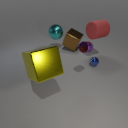

In [63]:
# data_path = os.path.join(data_root, f'{seq}.npz')
data_path = f'./data/{770}.npz'
with open(data_path, 'rb') as f:
    data = np.load(f)
    img_seq = data['rgb'][:8, 0].astype('float32')
    # (Frames, H, W, C) 
    img = img_seq[3]

    # loaded_data = torch.from_numpy(img).permute(2, 0, 1).float()
a = Image.fromarray(np.array(img * 255).astype(np.uint8))
a.save("fig_train37_gt.png")
a